In [14]:
#importing  neccesary library and  data 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Polygon
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import os
df = pd.read_csv("netflix1.csv")
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [15]:
# dropping ALL duplicate values
df.drop_duplicates(subset ="show_id",
                     keep = False, inplace = True)
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


In [17]:
#changing datatype of date_added column to datetime
df["date_added"] = pd.to_datetime(df["date_added"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 755.4+ KB


In [18]:
# added month_added column
df['month_added'] = df['date_added'].dt.month_name()
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September
...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",January
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,September
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",December
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,June


In [20]:
# added year_added column
df['year_added'] = df['date_added'].dt.year
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",January,2017
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,September,2018
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",December,2016
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,June,2018


In [22]:
# added day_added column
df['day_added']=df['date_added'].dt.day_name()
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,September,2021,Saturday
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021,Friday
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",September,2021,Friday
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",September,2021,Wednesday
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",January,2017,Tuesday
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,September,2018,Thursday
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",December,2016,Thursday
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,June,2018,Saturday


In [23]:
#types of show on netflix
types =df.groupby(['type'])[ 'type'].count().reset_index(name='count')
types=types.set_index('type')
types

,count
type,
Movie,6126
TV Show,2664


In [24]:
df["type"].nunique()

2

In [25]:
df["type"].count()

8790

In [27]:
#grouped by directors of show and type
show_director= df.groupby(['director','type'])[ 'director'].count().reset_index(name='show_count')
show_director

,director,type,show_count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
...,...,...,...
4576,Çagan Irmak,Movie,1
4577,Ísold Uggadóttir,Movie,1
4578,Óskar Thór Axelsson,Movie,1
4579,Ömer Faruk Sorak,Movie,2


In [28]:
#grouped by country
show_country=df.groupby(["country"])["country"].count().reset_index(name="show count")
show_country

,country,show count
0,Argentina,76
1,Australia,114
2,Austria,9
3,Bangladesh,3
4,Belarus,1
...,...,...
81,Uruguay,9
82,Venezuela,2
83,Vietnam,7
84,West Germany,1


In [29]:
#grouped by director
show_director= df.groupby(['director', "type"])[ 'director'].count().reset_index(name='show_count')
show_director.head(10)

,director,type,show_count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
5,Aamir Bashir,Movie,1
6,Aamir Khan,Movie,1
7,Aanand Rai,Movie,1
8,Aaron Burns,Movie,1
9,"Aaron Hancox, Michael McNamara",Movie,1


In [30]:

#top 10 directors
top10_directors=show_director.query("`show_count` >= 12")
top10_directors

,director,type,show_count
127,Alastair Fothergill,TV Show,14
690,Cathy Garcia-Molina,Movie,13
1800,Jay Chapman,Movie,12
1803,Jay Karas,Movie,14
2623,Marcus Raboy,Movie,15
2699,Martin Scorsese,Movie,12
3100,Not Given,Movie,173
3101,Not Given,TV Show,2415
3432,Rajiv Chilaka,Movie,19
3484,"Raúl Campos, Jan Suter",Movie,18


In [31]:
#group by countr and type
show_country=df.groupby(["country", "type"])["country"].count().reset_index(name="show count")
show_country

,country,type,show count
0,Argentina,Movie,56
1,Argentina,TV Show,20
2,Australia,Movie,61
3,Australia,TV Show,53
4,Austria,Movie,8
...,...,...,...
133,Uruguay,TV Show,1
134,Venezuela,Movie,2
135,Vietnam,Movie,7
136,West Germany,Movie,1


In [44]:
show_origin=df.groupby(["country", "type"])["country"].count().reset_index(name="show_count")
show_origin                                                                                

,country,type,show_count
0,Argentina,Movie,56
1,Argentina,TV Show,20
2,Australia,Movie,61
3,Australia,TV Show,53
4,Austria,Movie,8
...,...,...,...
133,Uruguay,TV Show,1
134,Venezuela,Movie,2
135,Vietnam,Movie,7
136,West Germany,Movie,1


In [45]:
#write query to find top20 country
top20_country=show_origin.query("`show_count` >= 81")
top20_country

,country,type,show_count
15,Canada,Movie,187
16,Canada,TV Show,84
30,Egypt,Movie,109
34,France,Movie,148
47,India,Movie,976
48,India,TV Show,81
49,Indonesia,Movie,84
59,Japan,Movie,87
60,Japan,TV Show,172
72,Mexico,Movie,90


In [46]:
show_origin.query("`show_count` >= 81")

,country,type,show_count
15,Canada,Movie,187
16,Canada,TV Show,84
30,Egypt,Movie,109
34,France,Movie,148
47,India,Movie,976
48,India,TV Show,81
49,Indonesia,Movie,84
59,Japan,Movie,87
60,Japan,TV Show,172
72,Mexico,Movie,90


In [80]:
#grouped by listed in and type
show_genre=df.groupby(["listed_in", "type"])["listed_in"].count().reset_index(name="show_count")
show_genre

,listed_in,type,show_count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
508,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
509,"TV Horror, Teen TV Shows",TV Show,2
510,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
511,TV Shows,TV Show,16


In [81]:
#write query to find top20 genre
top20_genre=show_genre.query("`show_count` >=110")
top20_genre

,listed_in,type,show_count
0,Action & Adventure,Movie,128
39,"Action & Adventure, Dramas, International Movies",Movie,132
120,Children & Family Movies,Movie,215
124,"Children & Family Movies, Comedies",Movie,201
184,Comedies,Movie,110
198,"Comedies, Dramas, Independent Movies",Movie,116
199,"Comedies, Dramas, International Movies",Movie,274
216,"Comedies, International Movies",Movie,176
219,"Comedies, International Movies, Romantic Movies",Movie,152
243,"Crime TV Shows, International TV Shows, TV Dramas",TV Show,110


In [92]:
#grouped by rating and type
show_rating=df.groupby(["rating", "type"])["rating"].count().reset_index(name="ratings_count")
show_rating=show_rating.set_index("rating")
show_rating.sort_values(by=["ratings_count"], ascending=False)
show_rating


,type,ratings_count
rating,,
G,Movie,41
NC-17,Movie,3
NR,Movie,75
NR,TV Show,4
PG,Movie,287
PG-13,Movie,490
R,Movie,797
R,TV Show,2
TV-14,Movie,1427


In [33]:
#filter by type=movie
rating_movie=df.groupby(["rating", "type"])["rating"].count().reset_index(name="ratings-count")
rating_movie=rating_movie.set_index("rating")
rating_movie
#sort
rating_movie.sort_values(by=["ratings-count"], ascending=True)




,type,ratings-count
rating,,
TV-Y7-FV,TV Show,1
R,TV Show,2
UR,Movie,3
NC-17,Movie,3
NR,TV Show,4
TV-Y7-FV,Movie,5
G,Movie,41
NR,Movie,75
TV-G,TV Show,94


In [9]:
dsc = df.groupby(["duration", "type"])["type"].count().reset_index(name="dsc")
dsc
#sort
dsc.sort_values(by=["duration"], ascending = False)

,duration,type,dsc
219,99 min,Movie,118
218,98 min,Movie,120
217,97 min,Movie,146
216,96 min,Movie,130
215,95 min,Movie,137
...,...,...,...
4,101 min,Movie,116
3,100 min,Movie,108
2,10 min,Movie,1
1,10 Seasons,TV Show,6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


In [32]:
#grouped by moth_added and type
release_month=df.groupby(["month_added", "type"])["type"].count().reset_index(name="release_month")
release_month
release_month = release_month.sort_values(by=["release_month"], ascending=True)
release_month

,month_added,type,release_month
7,February,TV Show,180
9,January,TV Show,192
17,May,TV Show,193
19,November,TV Show,207
15,March,TV Show,213
1,April,TV Show,214
21,October,TV Show,215
3,August,TV Show,236
13,June,TV Show,236
23,September,TV Show,251


In [33]:
#grouped by year added and type
release_year = df.groupby(["year_added", "type"])["type"].count().reset_index(name="release_count")
release_year


,year_added,type,release_count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


In [34]:
#grouped by day_added and type
release_Day=df.groupby(["day_added", "type"])["type"].count().reset_index(name="release_Day")
release_Day

,day_added,type,release_Day
0,Friday,Movie,1565
1,Friday,TV Show,932
2,Monday,Movie,627
3,Monday,TV Show,223
4,Saturday,Movie,557
5,Saturday,TV Show,259
6,Sunday,Movie,569
7,Sunday,TV Show,182
8,Thursday,Movie,1052
9,Thursday,TV Show,341


# VISUALIZATION

Text(0.5, 1.0, 'type_of_show')

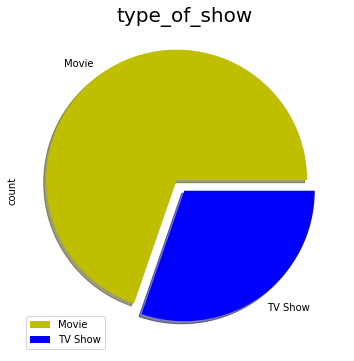

In [40]:
#percentage of types of show
colors = ["y", "b"]
myexplode = [0.1, 0.0]
types.plot.pie(y="count", shadow=True, legend="type", figsize=(6, 6), colors = colors, explode=myexplode)
plt.title("type_of_show", fontsize=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Canada'),
  Text(1, 0, 'Egypt'),
  Text(2, 0, 'France'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Indonesia'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'Mexico'),
  Text(7, 0, 'Nigeria'),
  Text(8, 0, 'Not Given'),
  Text(9, 0, 'Pakistan'),
  Text(10, 0, 'South Korea'),
  Text(11, 0, 'Spain'),
  Text(12, 0, 'Turkey'),
  Text(13, 0, 'United Kingdom'),
  Text(14, 0, 'United States')])

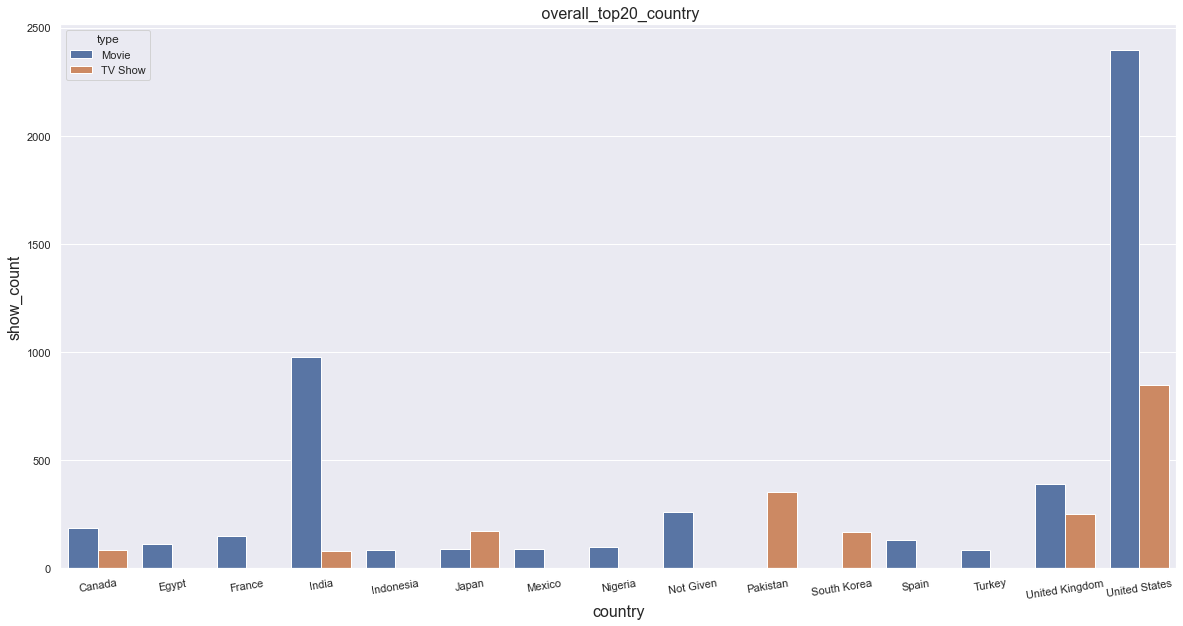

In [75]:
sns.barplot(x =top20_country.reset_index()['country'], y=top20_country.reset_index()['show_count'],
            hue =  top20_country.reset_index()['type']);
plt.title(' overall_top20_country', fontsize=16)
plt.xlabel('country', fontsize=16)
plt.ylabel('show_count', fontsize=16)
sns.set(rc = {'figure.figsize':(20,10)})
plt.xticks(rotation = 9)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Action & Adventure'),
  Text(1, 0, 'Action & Adventure, Dramas, International Movies'),
  Text(2, 0, 'Children & Family Movies'),
  Text(3, 0, 'Children & Family Movies, Comedies'),
  Text(4, 0, 'Comedies'),
  Text(5, 0, 'Comedies, Dramas, Independent Movies'),
  Text(6, 0, 'Comedies, Dramas, International Movies'),
  Text(7, 0, 'Comedies, International Movies'),
  Text(8, 0, 'Comedies, International Movies, Romantic Movies'),
  Text(9, 0, 'Crime TV Shows, International TV Shows, TV Dramas'),
  Text(10, 0, 'Documentaries'),
  Text(11, 0, 'Documentaries, International Movies'),
  Text(12, 0, 'Dramas'),
  Text(13, 0, 'Dramas, Independent Movies, International Movies'),
  Text(14, 0, 'Dramas, International Movies'),
  Text(15, 0, 'Dramas, International Movies, Romantic Movies'),
  Text(16, 0, 'Dramas, International Movies, Thrillers'),
  Text(17, 0, 'International TV Shows, TV D

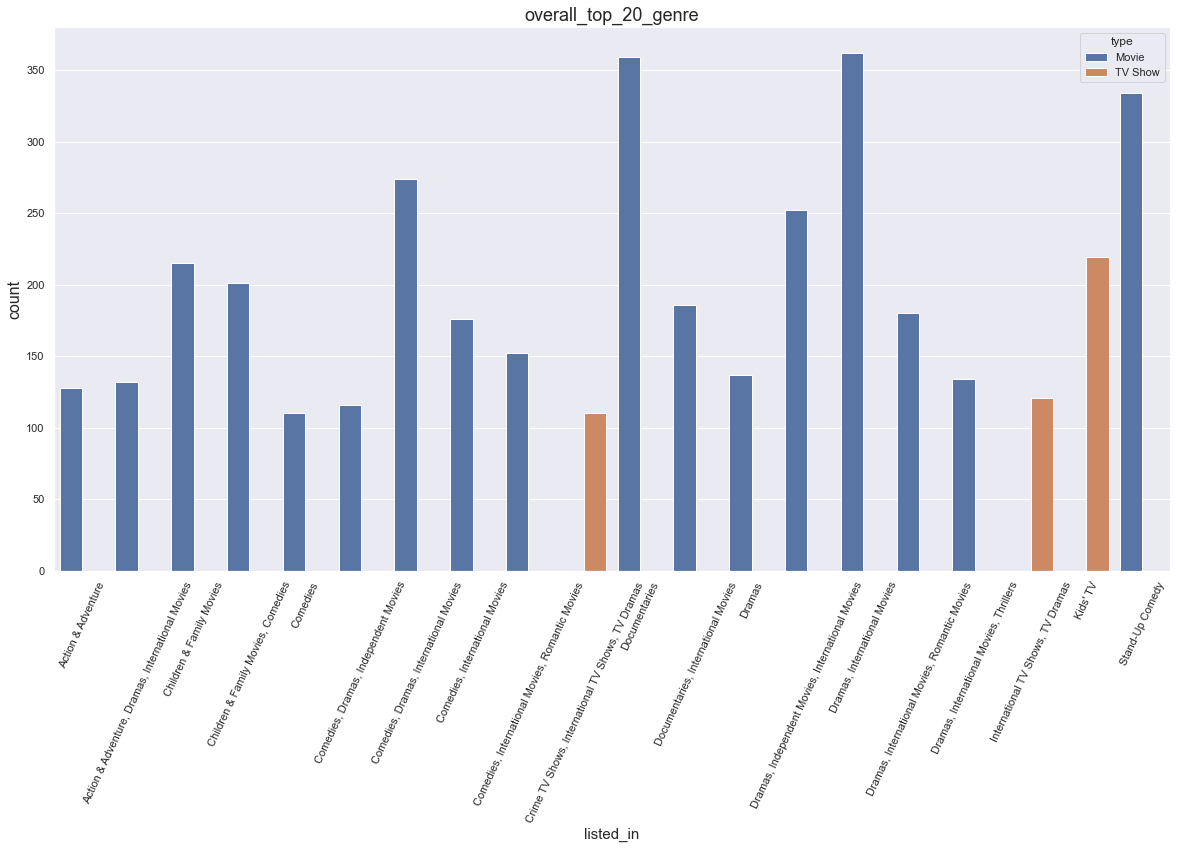

In [89]:
sns.barplot(x = top20_genre.reset_index()["listed_in"], y=top20_genre.reset_index()["show_count"], hue = top20_genre.reset_index()["type"])
plt.title("overall_top_20_genre", fontsize = 18)
plt.xlabel("listed_in", fontsize=15)
plt.ylabel("count", fontsize=16)
plt.xticks(rotation=65)

Text(0.5, 1.0, 'overall_ratings distribution')

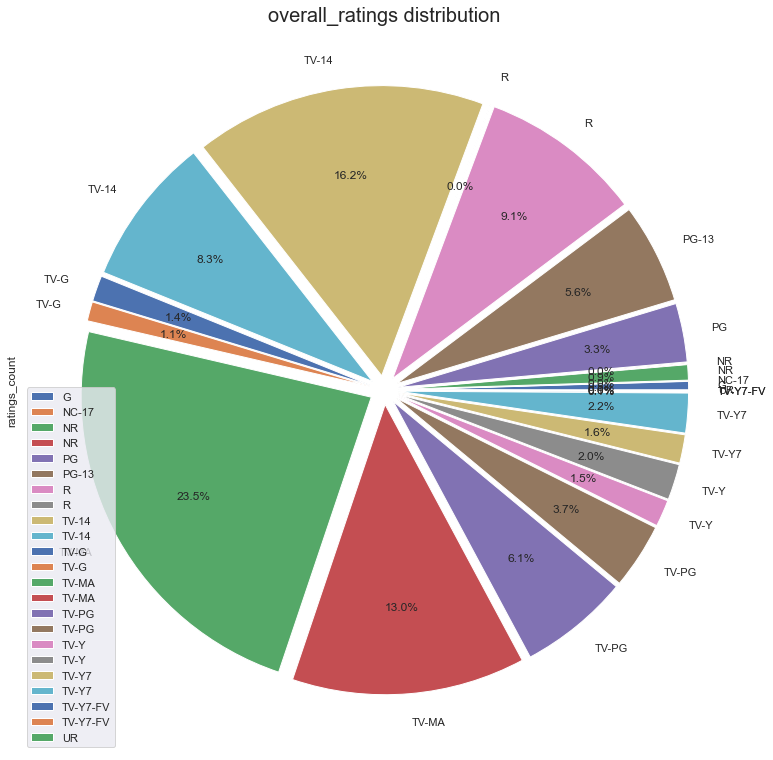

In [104]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05,0.05)
show_rating.plot.pie(y='ratings_count',autopct='%.1f%%', figsize=(13,17), pctdistance= 0.7,  explode=explode)
plt.title('overall_ratings distribution', fontsize=20)

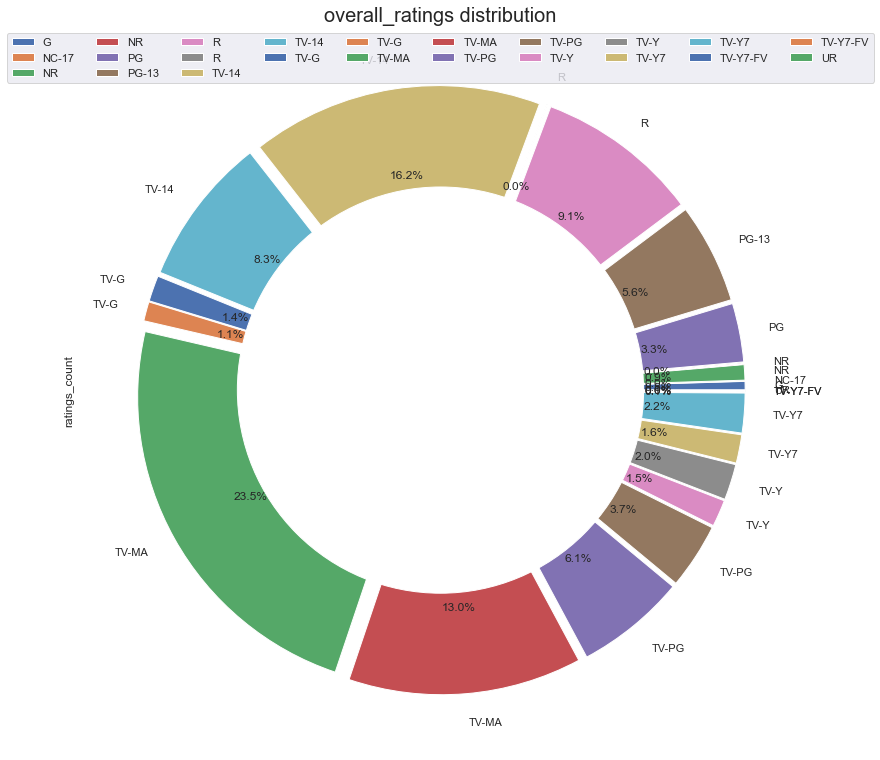

In [123]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05,0.05)
show_rating.plot.pie(y='ratings_count',autopct='%.1f%%', figsize=(13,17), pctdistance= 0.7,  explode=explode)
plt.title('overall_ratings distribution', fontsize=20)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(ncol=10, loc="upper center")



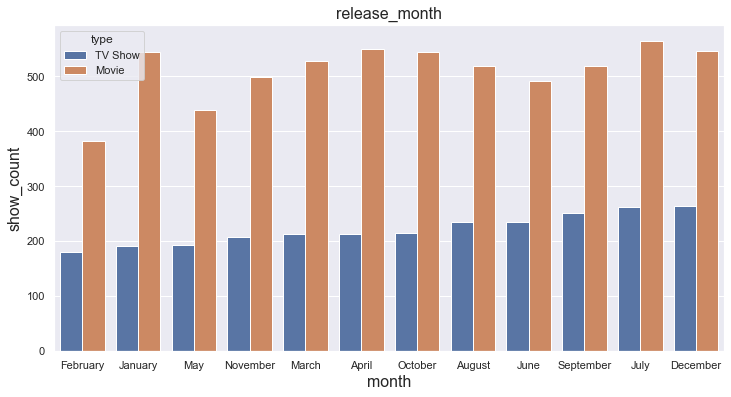

In [128]:
sns.barplot(x =release_month.reset_index()['month_added'], y= release_month.reset_index()['release_month'],
            hue =  release_month.reset_index()['type']);
plt.title('release_month' , fontsize=16)
plt.xlabel('month', fontsize=16);
plt.ylabel('show_count', fontsize=16);
sns.set(rc = {'figure.figsize':(12,6)})

[Text(0.5, 0, 'year'),
 Text(0, 0.5, 'release_count'),
 Text(0.5, 1.0, 'release_per_year')]

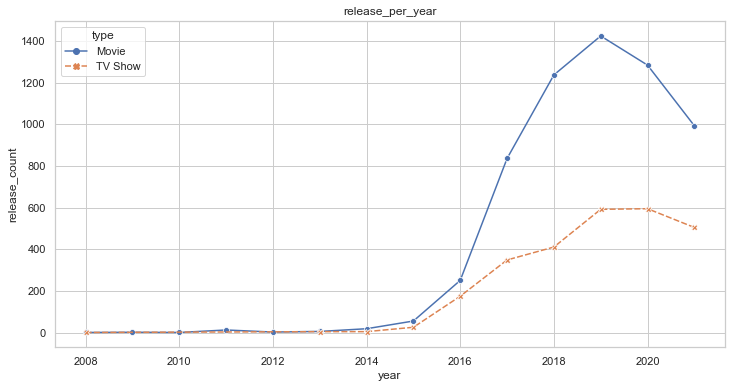

In [129]:
sns.set_style("whitegrid")
# plot boxplot
gfg = sns.lineplot(x ="year_added", y ="release_count", hue="type" ,style="type", markers=True, data = release_year)
 
# add label to the axis and label to the plot
gfg.set(xlabel ="year", ylabel = "release_count", title ='release_per_year')